In [1]:
# https://www.kaggle.com/hsankesara/flickr-image-dataset

! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/31296/39911/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586244948&Signature=QER5siwrR2gk5SuOZ%2BpKcAbSmNh0fCrUqIzPXsjWy6goXUk6ULHMqHZFmkZHoheiloVWbmF0J6tEk2rpvRBU3sWk2xmVRUfCPvlWdeGt6lkHKZb%2BjYuxn7%2ByOy%2FsdrmrcXm4zOWkqawWN1JHAywoltoV6kYj%2BcksVHerq8RSuLW95tlyIWe08jcjxHp3PQu1KrAx1aN59TfLGm6KAof%2B4v3yGtGkiCOuG7Yj6WwJ4OTbaE8ZJhQIu1tPGE28t5RNzYQAhfTB3Mah5adSkGAYqiCht0F4BJ6U7PR56jGyEbX25RCAPqV6JZRIf06QX1gU1%2BBpUNP4cl0iCkifGerN2A%3D%3D&response-content-disposition=attachment%3B+filename%3Dflickr-image-dataset.zip" -c -O 'flickr-image-dataset.zip'


--2020-04-04 18:32:54--  https://storage.googleapis.com/kaggle-data-sets/31296/39911/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586244948&Signature=QER5siwrR2gk5SuOZ%2BpKcAbSmNh0fCrUqIzPXsjWy6goXUk6ULHMqHZFmkZHoheiloVWbmF0J6tEk2rpvRBU3sWk2xmVRUfCPvlWdeGt6lkHKZb%2BjYuxn7%2ByOy%2FsdrmrcXm4zOWkqawWN1JHAywoltoV6kYj%2BcksVHerq8RSuLW95tlyIWe08jcjxHp3PQu1KrAx1aN59TfLGm6KAof%2B4v3yGtGkiCOuG7Yj6WwJ4OTbaE8ZJhQIu1tPGE28t5RNzYQAhfTB3Mah5adSkGAYqiCht0F4BJ6U7PR56jGyEbX25RCAPqV6JZRIf06QX1gU1%2BBpUNP4cl0iCkifGerN2A%3D%3D&response-content-disposition=attachment%3B+filename%3Dflickr-image-dataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 2607:f8b0:4001:c16::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8765396518 (8.2G) [application/zip]
Saving to: ‘flickr-image-dataset.zip’

flickr-image-datase 100%[============

In [2]:

import datetime
import time

start= time.time()

import zipfile
with zipfile.ZipFile("/content/flickr-image-dataset.zip","r") as zip_ref:
  zip_ref.extractall()

print("Time Taken is: " + str(time.time() - start))

Time Taken is: 217.12104773521423


In [3]:
!pip3 install contractions

     |████████████████████████████████| 317kB 4.6MB/s 
     |████████████████████████████████| 245kB 10.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81707 sha256=2a8fb1765e60592defcf071a8d0a1609caac7029ddf4d0df888c6c8e142c00e2
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [0]:
# We import necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
import pickle
from time import time
from bs4 import BeautifulSoup
import contractions
import re

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                                    Activation, Flatten, Reshape, concatenate, Dropout, \
                                    BatchNormalization, Bidirectional 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import Input, layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [5]:
# https://stackoverflow.com/a/18129082/10219869

df= pd.read_csv(r'/content/flickr30k_images/results.csv', error_bad_lines=False, sep='|')
print(df.shape)
df.head(10)

(158915, 3)


,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
5,10002456.jpg,0,Several men in hard hats are operating a gian...
6,10002456.jpg,1,Workers look down from up above on a piece of...
7,10002456.jpg,2,Two men working on a machine wearing hard hats .
8,10002456.jpg,3,Four men on top of a tall structure .
9,10002456.jpg,4,Three men on a large rig .


In [6]:
# To check the names of columns
df.columns

Index(['image_name', ' comment_number', ' comment'], dtype='object')

In [7]:
df[' comment'][:5]

0     Two young guys with shaggy hair look at their...
1     Two young , White males are outside near many...
2     Two men in green shirts are standing in a yard .
3         A man in a blue shirt standing in a garden .
4              Two friends enjoy time spent together .
Name:  comment, dtype: object

In [8]:
# for every five consecutive indexes, there is same image hence same name.
df['image_name'][:5]

0    1000092795.jpg
1    1000092795.jpg
2    1000092795.jpg
3    1000092795.jpg
4    1000092795.jpg
Name: image_name, dtype: object

In [9]:
# Check for any nan values

print('Image_name:\n', df[df['image_name'].isnull()])
print('Comment_number:\n', df[df[' comment_number'].isnull()])
print('Comment:\n', df[df[' comment'].isnull()])

Image_name:
 Empty DataFrame
Columns: [image_name,  comment_number,  comment]
Index: []
Comment_number:
 Empty DataFrame
Columns: [image_name,  comment_number,  comment]
Index: []
Comment:
            image_name                      comment_number  comment
19999  2199200615.jpg   4   A dog runs across the grass .      NaN


In [0]:
# As we see there is aproblem with index number 19999 and we shall solve it by replacing these values
# https://stackoverflow.com/a/37725243/10219869

df.loc[19999, ' comment_number'] = 4
df.loc[19999, ' comment'] = 'A dog runs across the grass .'


In [11]:
# Now it is good
df[19999:20000]

,image_name,comment_number,comment
19999,2199200615.jpg,4,A dog runs across the grass .


In [12]:
# Considering 30,000 captions => 6000 Images

new_df= df[:30000]
new_df.tail(10)

,image_name,comment_number,comment
29990,244829722.jpg,0,A woman in a white t-shirt is in a swing that...
29991,244829722.jpg,1,A girl going on a ride in a circus that spins...
29992,244829722.jpg,2,A young woman rides by herself on a swinging ...
29993,244829722.jpg,3,Girl in a swing ride at an amusement park or ...
29994,244829722.jpg,4,A woman is on a carnival swing ride .
29995,2448393373.jpg,0,A young boy wearing blue is holding a blue ba...
29996,2448393373.jpg,1,"A boy with a plastic bat , looking skyward , ..."
29997,2448393373.jpg,2,A small boy playing in the grass with a blue ...
29998,2448393373.jpg,3,A little boy plays baseball with himself .
29999,2448393373.jpg,4,A boy plays baseball .


In [13]:
# We need the words for corpus and we need to clean the sentences based on the below conditions

def clean_sentence(text):
  text = BeautifulSoup(text, 'lxml').get_text() # removes html tags such as <br />
  text = ''.join([i for i in text if not i.isdigit()]) # removes numbers
  text = text.lower() # converts text to lower case
  text = contractions.fix(text) # converts (don't) to (do not)
  text = re.sub('\W+',' ',text) # removes all special chars, punc
  text = text.split(' ')
  return text

# Clean the individual sentences and then obtain a set of word corpus
sentences= [clean_sentence(i) for i in new_df[' comment']]
print('Length of sentences:', len(sentences))

Length of sentences: 30000


In [14]:
# We observed a space at the end of every string hence we need to remove it
new_sentences= []
for i in sentences:
  del i[-1]
  new_sentences.append(i)

print(len(new_sentences))

30000


In [0]:
"""Now, we create a dictionary named “desc” which contains the name of the image (without the .jpg extension) 
   as keys and a list of the 5 captions for the corresponding image as values."""

# We remove the jpg extension from name of image and then remove the 5 duplicate names to 1 name
image= [i.replace('.jpg','') for i in new_df['image_name']]

# https://stackoverflow.com/a/7961390/10219869
from collections import OrderedDict
key= list(OrderedDict.fromkeys(image))

comment= [' '.join(i) for i in sentences] # sentences, because we have already cleaned them.

# https://stackoverflow.com/a/312464/10219869
# 5 captions for a single image
value= [comment[i:i+5] for i in range(0, len(comment), 5)]

desc= dict(zip(key, value))

In [16]:
# Sample output before
desc['1000092795']

['two young guys with shaggy hair look at their hands while hanging out in the yard',
 'two young white males are outside near many bushes',
 'two men in green shirts are standing in a yard',
 'a man in a blue shirt standing in a garden',
 'two friends enjoy time spent together']

In [0]:
# We split the data into train and test at 95% train (5700) and 5% test (300).

train_desc= dict(list(desc.items())[0:5700])
test_desc= dict(list(desc.items())[5700:])

In [0]:
# We append the ‘startseq’ and ‘endseq’ for each caption in order for data generator
# ‘startseq’ -> This is a start sequence token which will be added at the start of every caption.
# ‘endseq’ -> This is an end sequence token which will be added at the end of every caption.

train_key= list(train_desc.keys())
values= []
for i in list(train_desc.values()):
  v=[]
  for j in i:
    a= 'startseq ' + j + ' endseq'
    v.append(a)
  values.append(v)

new_desc= dict(zip(train_key, values))

In [19]:
# A sample check

values[0]

['startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq',
 'startseq two young white males are outside near many bushes endseq',
 'startseq two men in green shirts are standing in a yard endseq',
 'startseq a man in a blue shirt standing in a garden endseq',
 'startseq two friends enjoy time spent together endseq']

In [20]:
# all words (new_desc is train data) into this list        
word_corpus=[]

for i in list(new_desc.values()):
  for j in i:
    j= j.split(' ')
    for k in j:
      word_corpus.append(k)
      
print('Total words before Duplicates:', len(word_corpus))
words_corpus= set(word_corpus)
print('Total words after removing duplicates:',len(words_corpus))

Total words before Duplicates: 400159
Total words after removing duplicates: 8937


In [21]:
# We consider those words which occurred more than 5 times in a corpus
'''
Since we are creating a predictive model, we would not like to have all the words present in our vocabulary but the words 
which are more likely to occur or which are common. This helps the model become more robust to outliers and make less mistakes.
'''
# https://stackoverflow.com/a/26773321/10219869

from collections import Counter
cnt= Counter(word_corpus)
new_word_corpus= [i for i in cnt if cnt[i] > 5]

print('Total number of words appearing more than 5 times :',len(new_word_corpus))

# for zero padding we consider + 1 to the above count => 2831

Total number of words appearing more than 5 times : 2830


In [22]:
# Now we combine all the captions in new_desc (train data)

train_captions= []
for i in list(new_desc.values()):
  for j in i:
    train_captions.append(j)

print(len(train_captions))

28500


In [23]:
# Word mapping to integers and vice versa for new_corpus_words (words got repeated > 5 times)

new_keys= list(range(1, 2831))

ix_to_word= dict(zip(new_keys, new_word_corpus))
word_to_ix= dict(zip(new_word_corpus, new_keys))

# Sample answers
print(list(ix_to_word.items())[:10])

print(list(word_to_ix.items())[:10])

[(1, 'startseq'), (2, 'two'), (3, 'young'), (4, 'guys'), (5, 'with'), (6, 'shaggy'), (7, 'hair'), (8, 'look'), (9, 'at'), (10, 'their')]
[('startseq', 1), ('two', 2), ('young', 3), ('guys', 4), ('with', 5), ('shaggy', 6), ('hair', 7), ('look', 8), ('at', 9), ('their', 10)]


In [24]:
word_to_ix['startseq']

1

In [25]:
ix_to_word[1]

'startseq'

In [26]:
vocab_size = len(ix_to_word) + 1  #1 for appended zeros
vocab_size

2831

In [27]:
# To find the max length  of a description so that we can easily pad sequences
l= []
for i in train_captions:
  i= i.split()
  l.append(len(i))

print('Max length of caption:', max(l))

Max length of caption: 80


In [28]:
# This is the caption which has maximum length of words.
# l.index(80)
print(train_captions[16050])

startseq a man wearing a helmet red pants with white stripes going down the sides and a white and red shirt is on a small bicycle using only his hands while his legs are up in the air while another man wearing a light blue shirt with dark blue trim and black pants with red stripes going up the sides is standing nearby gesturing toward the first man and holding a small figurine of one of the seven dwarves endseq


(500, 333, 3)
(374, 500, 3)
(500, 375, 3)
(333, 500, 3)
(375, 500, 3)
(333, 500, 3)


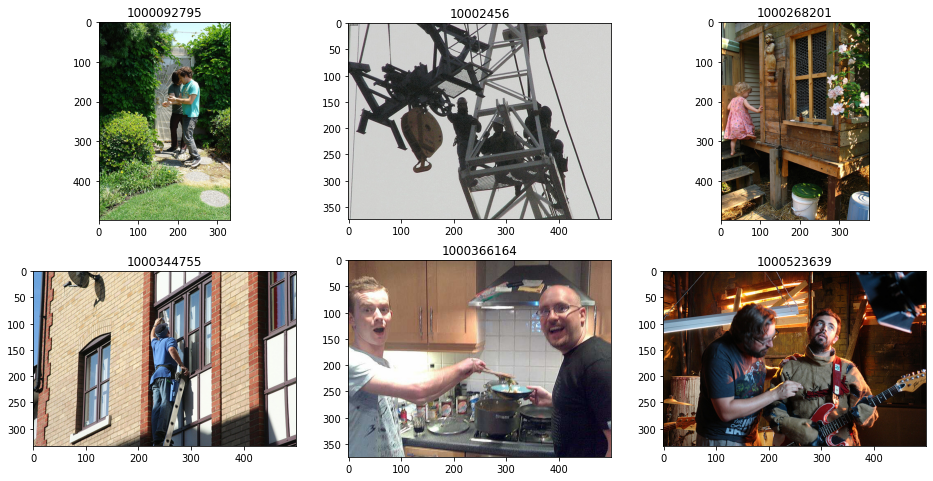

In [29]:
# We now check sample images

path= '/content/flickr30k_images/flickr30k_images/'   # the path is provided

image=[]
for i in key[:6]:
  image.append(path+i+'.jpg')                         # we append the name of image to path along with .jpg string

title= key[:6]
plt.figure(figsize= (16, 8))

for i in range(6):
  plt.subplot(2, 3, i+1)
  j= plt.imread(image[i])
  print(j.shape)
  plt.imshow(j)
  plt.title(title[i])

plt.show()                                            

In [30]:
# We create new list and preserve the images
import time
start= time.time()

Images= [path+i+'.jpg' for i in key]
print('No of Images: ', len(Images))

# We check the max and min shape of images
width=[]
height=[]

for i in Images:
  j= plt.imread(i)
  w, h, channel= j.shape
  width.append(w)
  height.append(h)
  
print('Max Width: ', max(width))
print('Min Width: ', min(width))
print('Max Height: ', max(height))
print('Min Height: ', min(height))

print("Time Taken is: " + str(time.time() - start))

No of Images:  6000
Max Width:  500
Min Width:  157
Max Height:  500
Min Height:  200
Time Taken is: 26.211413621902466


In [31]:
# Just to ensure the sequence to dictionary matches with sequence of images
a= dict(zip(list(train_desc.keys())[:10], Images[:10]))
a

{'1000092795': '/content/flickr30k_images/flickr30k_images/1000092795.jpg',
 '10002456': '/content/flickr30k_images/flickr30k_images/10002456.jpg',
 '1000268201': '/content/flickr30k_images/flickr30k_images/1000268201.jpg',
 '1000344755': '/content/flickr30k_images/flickr30k_images/1000344755.jpg',
 '1000366164': '/content/flickr30k_images/flickr30k_images/1000366164.jpg',
 '1000523639': '/content/flickr30k_images/flickr30k_images/1000523639.jpg',
 '1000919630': '/content/flickr30k_images/flickr30k_images/1000919630.jpg',
 '10010052': '/content/flickr30k_images/flickr30k_images/10010052.jpg',
 '1001465944': '/content/flickr30k_images/flickr30k_images/1001465944.jpg',
 '1001545525': '/content/flickr30k_images/flickr30k_images/1001545525.jpg'}

In [32]:
# To split the images into train and test based on 95% ratio of 30200 and 5% 1583 totalled to 31783.

train_images= Images[:5700]
test_images= Images[5700:]
print(len(train_images))
print(len(test_images))


5700
300


In [33]:
base_model = InceptionV3(weights = 'imagenet')
base_model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

In [0]:
model = Model(base_model.input, base_model.layers[-2].output)

In [35]:
from keras.preprocessing.image import load_img, img_to_array
def preprocess_img(img_path):
    # inception v3 excepts img in 299*299
    img = load_img(img_path, target_size = (299, 299))
    x = img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    return x

Using TensorFlow backend.


In [0]:
# function to encode an image into a vector  
def encode(image):
  image = preprocess_img(image)
  vec = model.predict(image)
  vec = np.reshape(vec, (vec.shape[1]))
  return vec

In [37]:
# run the encode function on all train images in a dictionary {image: 2048 vector size}

start = time.time()

encoding_train = {}
for img in train_images:
  # img(len(path)): means to start from there (discard the path and hence remains image name)
  encoding_train[img[len(path):]] = encode(img)

print("Time Taken is: " + str(time.time() - start))

Time Taken is: 237.73764514923096


In [38]:
print('The length of encode vector which is value:', len(list(encoding_train.values())[0]))

The length of encode vector which is value: 2048


In [39]:
# Just to ensure the sequence to dictionary matches with sequence of images
a= list(encoding_train.items())[:2]
a

[('1000092795.jpg',
  array([0.18249522, 0.16290566, 0.522696  , ..., 0.6769272 , 0.32858288,
         0.08636494], dtype=float32)),
 ('10002456.jpg',
  array([0.5403669 , 0.11955979, 0.03325099, ..., 1.0153631 , 0.02305902,
         0.7214722 ], dtype=float32))]

In [40]:
# test images

start = time.time()

encoding_test = {}
for img in test_images:
    encoding_test[img[len(path):]] = encode(img)

print("Time Taken is: " + str(time.time() - start))

print(len(list(encoding_test.values())[0]))

Time Taken is: 12.111755847930908
2048


In [41]:

print("Train image encodings: " + str(len(encoding_train)))
print("Test image encodings: " + str(len(encoding_test)))

Train image encodings: 5700
Test image encodings: 300


In [42]:
start= time.time()

# Our Input shall be 2048 (dense) + [80 (word_to_ix padded) * 300 (w2v) = 24000] = 26048 and 
# final size of the data matrix is 602629 * 26048= 1.57 * e^10 blocks hence below data generator function
# 47500 captions * 12.7 (avg words in a caption) = 602629
# output shall be scalar among 3693 (vocab)

X1, X2, y = list(), list(), list()

for key, des_list in new_desc.items():
    pic = encoding_train[key + '.jpg']
    for cap in des_list:
        seq = [word_to_ix[word] for word in cap.split(' ') if word in word_to_ix]
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen = max(l))[0]
            out_seq = to_categorical([out_seq], num_classes = vocab_size)[0]
            #store
            X1.append(pic)
            X2.append(in_seq)
            y.append(out_seq)

X1 = np.array(X1)
X2 = np.array(X2)
y = np.array(y)
print('The shape of the Image vector(output from Inception network): ', X1.shape)

print('The shape of the maximum length padded sequence vector: ', X2.shape)

print('The unique vocabulary: ', y.shape)

print("Time Taken is: " + str(time.time() - start))

The shape of the Image vector(output from Inception network):  (359954, 2048)
The shape of the maximum length padded sequence vector:  (359954, 80)
The unique vocabulary:  (359954, 2831)
Time Taken is: 170.56092047691345


In [43]:
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Cookie: _ga=GA1.2.875242895.1577023156; _gid=GA1.2.2102497446.1577023156; _gat=1" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" -O "glove.6B.zip" -c

--2020-04-04 18:47:50--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  1.99MB/s    in 6m 27s  

2020-04-04 18:54:18 (2.12 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [44]:
from zipfile import ZipFile 
file_name = "glove.6B.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
glove.6B.50d.txt                               2014-08-04 13:15:00    171350079
glove.6B.100d.txt                              2014-08-04 13:14:34    347116733
glove.6B.200d.txt                              2014-08-04 13:14:44    693432828
glove.6B.300d.txt                              2014-08-27 12:19:16   1037962819
Extracting all the files now...
Done!


In [45]:
#load glove vectors for embedding layer
embeddings_index = {}
glove = open('glove.6B.300d.txt', 'r', encoding = 'utf-8').read()
for line in glove.split("\n"):
    values = line.split(" ")
    word = values[0]
    indices = np.asarray(values[1: ], dtype = 'float32')
    embeddings_index[word] = indices
print('Total word vectors: ' + str(len(embeddings_index)))

Total word vectors: 400001


In [46]:
emb_vec = embeddings_index.get('two')
print(emb_vec.shape)

(300,)


In [47]:
emb_vec = embeddings_index.get('endseq')
print(emb_vec)

None


In [48]:
emb_dim = 300
emb_matrix = np.zeros((vocab_size, emb_dim))
emb_matrix.shape

(2831, 300)

In [82]:
from tqdm import tqdm
for word, i in tqdm(enumerate(word_to_ix)):
  emb_vec = embeddings_index.get(word)
  if emb_vec is not None:
    emb_matrix[i] = emb_vec
    
emb_matrix.shape

2830it [00:00, 601554.85it/s]


(2831, 300)

In [84]:
# a sample output
emb_matrix[10]

array([-7.06010014e-02,  5.49090028e-01, -2.55360007e-01, -1.65439993e-01,
       -3.44640017e-02,  2.91489989e-01, -1.23630002e-01,  3.48080009e-01,
        1.24080002e-01, -1.72790003e+00, -4.13489997e-01, -8.40670019e-02,
       -5.36409974e-01, -2.92789996e-01, -3.71349990e-01,  2.18899995e-01,
        8.35399985e-01, -2.47569993e-01, -3.65240008e-01, -2.29939997e-01,
        2.10429996e-01, -1.47120003e-02,  9.84990001e-02,  5.19759990e-02,
        1.59189999e-01, -2.32639998e-01,  9.04410034e-02,  2.08460003e-01,
       -4.00150001e-01,  2.23529994e-01, -1.22199997e-01,  2.10360005e-01,
       -1.76829994e-01,  6.32990003e-02, -1.04779994e+00,  3.56709987e-01,
        4.15420011e-02,  2.11099997e-01,  3.39379996e-01, -3.03990006e-01,
        1.84699997e-01, -1.56599998e-01, -2.59579986e-01,  2.20599994e-01,
        3.11369985e-01,  6.27820015e-01, -1.40650004e-01,  5.00699997e-01,
       -2.23810002e-02, -1.96040004e-01,  4.37559992e-01, -6.84360027e-01,
        4.73630009e-03, -

In [70]:
# Here we cannot use Sequential API and we use Functional API which allows us to merge models

# Defining the Model-1 (Image)
ip1 = Input(shape = (2048, ))

fe1 = Dropout(0.3)(ip1)
fe2 = Dense(512, activation = 'relu')(fe1)

# Defining Model-II (24048 embedding vectors), max(l)= 80
ip2 = Input(shape = (max(l), ))

# Masking= True works as 'ffill' when a zero is occurred in an array.
# https://stackoverflow.com/a/53470422/10219869
se1 = Embedding(vocab_size, emb_dim, mask_zero= True)(ip2)
se2 = Bidirectional(LSTM(256) )(se1)
se3 = Dropout(0.3)(se2)

# This is where we merge the models
decoder1 = tf.keras.layers.add([fe2, se3])
decoder2 = Dense(256, activation = 'relu')(decoder1)

outputs = Dense(vocab_size, activation = 'softmax')(decoder2)

model = Model(inputs = [ip1, ip2], outputs = outputs)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 80)]         0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 80, 300)      849300      input_13[0][0]                   
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 2048)         0           input_12[0][0]                   
____________________________________________________________________________________________

In [52]:
model.layers[2]

In [0]:
model.layers[2].set_weights([emb_matrix]) # we can see this in above summary [2] means third position
model.layers[2].trainable = False
adam=  tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam)


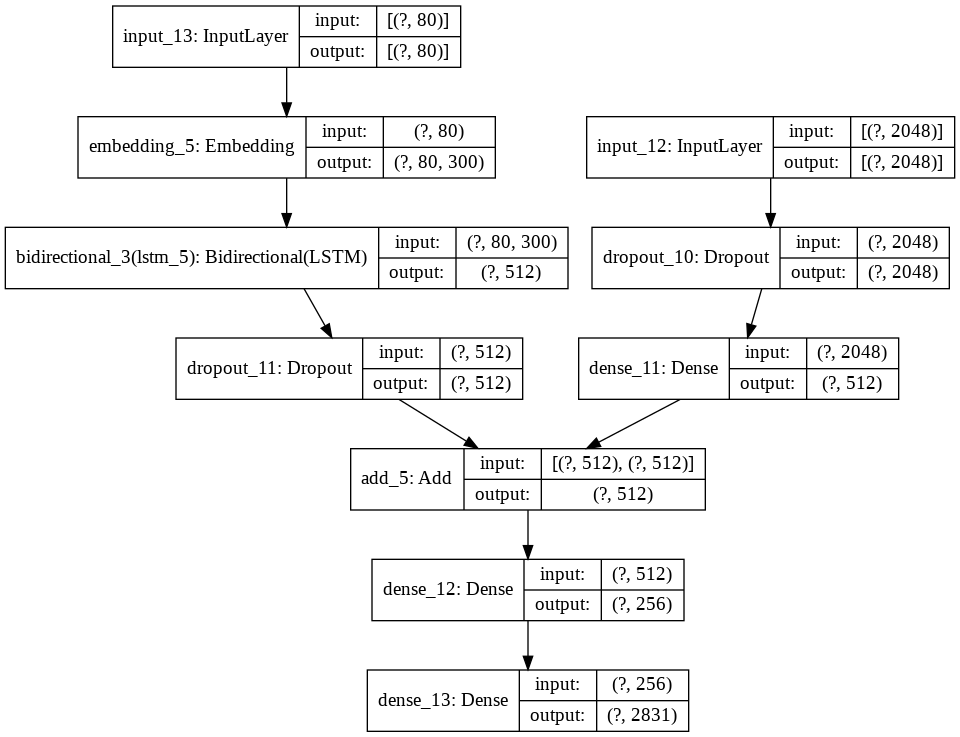

In [72]:
tf.keras.utils.plot_model(
    model,
    to_file='model_1.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [86]:
start= time.time()

for i in range(20):
    model.fit([X1, X2], y, epochs = 1, batch_size = 512)
    if(i%2 == 0):
        model.save_weights("image-caption-weights_new" + str(i) + ".h5")

print("Time Taken is: " + str(time.time() - start))

704/704 [==============================] - 189s 268ms/step - loss: 2.8533
Time Taken is: 3774.62273645401


In [0]:
'''
The model generates a n-long vector(while 2831 - long vector in the original example) which is a probability distribution 
across all the words in the vocabulary. For this reason we greedily select the word
with the maximum probability, given the feature vector and partial caption.
This is called as Maximum Likelihood Estimation (MLE) 
'''

def greedy_search(pic):
    start = 'startseq'
    for i in range(max(l)):
        seq = [word_to_ix[word] for word in start.split() if word in word_to_ix]
        seq = pad_sequences([seq], maxlen = max(l))
        yhat = model.predict([pic, seq])
        yhat = np.argmax(yhat)                       # max probability of 3693 words are preserved based on caption length words.
        word = ix_to_word[yhat]
        start += ' ' + word
        if word == 'endseq':
            break
    final = start.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

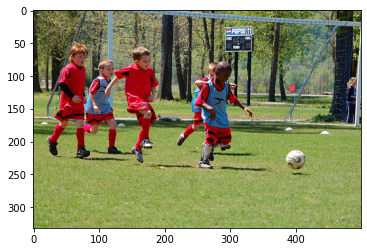

a young boy in a red uniform is playing a soccer ball


In [87]:
pic = list(encoding_test.keys())[202]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(path + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

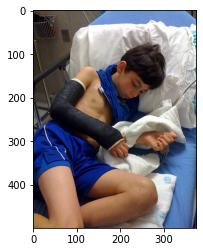

a young boy in a blue shirt and blue shorts is sleeping on a chair


In [88]:
pic = list(encoding_test.keys())[209]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(path + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))

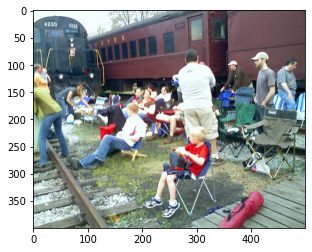

a group of people are sitting on a picnic


In [92]:
pic = list(encoding_test.keys())[99]
img = encoding_test[pic].reshape(1, 2048)
x = plt.imread(path + pic)
plt.imshow(x)
plt.show()
print(greedy_search(img))